 <b>Software Engineer Migration Index </b>
 A composite indicator for evaluating countries for software engineers
 
Datasets 

- Indeed Software Engineer Job Dataset 
https://www.kaggle.com/datasets/samrat77/indeed-software-engineer-job-dataset 

- Healthy Lifestyle Cities Report 2021 
https://www.kaggle.com/datasets/prasertk/healthy-lifestyle-cities-report-2021 

- LinkedIn Software Engineering Jobs Dataset 
https://www.kaggle.com/datasets/asaniczka/software-engineer-job-postings-linkedin 

- Quality of Life for Each Country 
https://www.kaggle.com/datasets/ahmedmohamed2003/quality-of-life-for-each-country 

- Quality of Life Index by Country 
https://www.kaggle.com/datasets/marcelobatalhah/quality-of-life-index-by-country 
 

Articles 

https://www.linkedin.com/pulse/top-10-best-countries-software-engineers-2023-dannielle-seddon 
1. USA 
2. Canada 
3. Switzerland 

https://www.wearedevelopers.com/en/magazine/267/best-countries-for-software-engineers 
1. Canada 
2. Australia 
3. Sweden 

https://en.dev.bg/what-are-the-best-countries-for-software-engineers/ 
1. Canada 
2. Switzerland 
3. USA 

https://www.hackerearth.com/blog/developers/best-countries-software-engineers-developers-work-2017/ 
1. Switzerland 
2. Canada 
3. Australia 

https://www.geeksforgeeks.org/best-countries-for-software-engineers/ 
1. Switzerland 
2. USA 
3. UK 

https://medium.com/@analyticsinsight/best-countries-for-programming-jobs-4d264f37e001 
1. Switzerland 
2. USA 
3. UK 

https://rolespilot.com/blog/best-countries-for-software-engineers/ 
1. USA 
2. Switzerland 
3. Canada 

Asking CHATGPT 
https://chatgpt.com/c/67c8ab10-c968-8000-bd6b-928edde583c2 
1. Germany 
2. Canada 
3. USA 

Initial prediction  

1. Switzerland 
2. Canada 
3. USA 
 

In [311]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import pearsonr


<b>1.Theoretical Framework </b>

Software Engineer Migration Index

This index will help software engineers find the most attractive countries to work in. As there is a ever growing demand for developers globally This index will provide data driven insight to help software engineers make a informed decision with a consideration of both professional growth and opertunity as well as  a high quality of life.

Motivation:
The index was create to adress three critical requirements
1. Carrer development - Identify countries that are offering high wages and job potential for software developers
2. Qaulity of life - A high standard on the quality of daily life
3. Personal Relevence - As a soon to be software engineering graduate this analysis will help me choose my own choice for migration post graduation.

Index Composition
Sub- Indices
1. Economic Potential ( Salary + Purchasing power) - 35 %
2. Living Standards (Safety + Healthcare + Quality of Life) - 30%
3. Enviornmental Quality (Climate + Pollution) - 20%
4. Urban Efficiency (property price + Traffic) - 15%

By looking at these factors the Software engineering migration index will be able to compare countries as potential destinations fot software engineers.

<b>2.Data Selection</b> 

In [312]:
file_path = 'globalJobs.csv'
jobsData = pd.read_csv(file_path)
print(jobsData.head())

       Country             Job Title                Category  Salary Currency  \
0  Afghanistan      Account Examiner  Accounting and Finance  501400      AFN   
1  Afghanistan     Account Executive  Accounting and Finance  890100      AFN   
2  Afghanistan            Accountant  Accounting and Finance  705500      AFN   
3  Afghanistan    Accounting Analyst  Accounting and Finance  810500      AFN   
4  Afghanistan  Accounting Assistant  Accounting and Finance  552400      AFN   

   Exchange Rate  Salary (USD)  
0      71.244429       7037.74  
1      71.244429      12493.61  
2      71.244429       9902.53  
3      71.244429      11376.33  
4      71.244429       7753.59  


In [313]:
file_path = 'Quality_of_Life.csv'
countryData = pd.read_csv(file_path)
print(countryData.head())

         country  Purchasing Power Value Purchasing Power Category  \
0    Afghanistan                   32.15                'Very Low'   
1  Aland Islands                  125.01               'Very High'   
2        Albania                   42.82                     'Low'   
3       Alderney                    0.00                       NaN   
4        Algeria                   27.60                'Very Low'   

   Safety Value Safety Category  Health Care Value Health Care Category  \
0         25.33           'Low'              24.24                'Low'   
1         71.81          'High'              79.72               'High'   
2         55.52      'Moderate'              48.21           'Moderate'   
3         83.79     'Very High'             100.00          'Very High'   
4         47.54      'Moderate'              54.43           'Moderate'   

   Climate Value Climate Category  Cost of Living Value  \
0           0.00              NaN                 21.08   
1         

<b>3.Imputation of missing data  </b>

In [314]:
print(jobsData.isnull().sum()) 

print(jobsData.describe())

Country          0
Job Title        0
Category         0
Salary           0
Currency         0
Exchange Rate    0
Salary (USD)     0
dtype: int64
             Salary  Exchange Rate  Salary (USD)
count  8.371250e+05  837125.000000  8.371250e+05
mean   8.454217e+06    1531.410036  4.092947e+04
std    4.866869e+07    7490.026552  2.645599e+05
min    2.020000e+03       0.307772  2.895000e+01
25%    3.964000e+04       1.000000  6.255010e+03
50%    1.432000e+05      10.803173  1.470430e+04
75%    1.621400e+06     177.942203  3.256619e+04
max    2.604000e+09   90879.938461  1.617476e+07


In [315]:
jobsData = jobsData[jobsData["Category"] == "Information Technology"]
print(jobsData["Category"].unique())

['Information Technology']


<h6>This will remove all the jobs that are not part of the Information Technology Category</h6>

In [316]:
jobsData = jobsData[~jobsData["Job Title"].str.contains("Manager", case=False, na=False)]
jobsData = jobsData[~jobsData["Job Title"].str.contains("Director", case=False, na=False)]
jobsData = jobsData[~jobsData["Job Title"].str.contains("Executive", case=False, na=False)]
jobsData = jobsData[~jobsData["Job Title"].str.contains("Chief Information Officer", case=False, na=False)]
jobsData = jobsData[~jobsData["Job Title"].str.contains("Supervisor", case=False, na=False)]
jobsData = jobsData[~jobsData["Job Title"].str.contains("Head of", case=False, na=False)]
jobsData = jobsData[~jobsData["Job Title"].str.contains("Administrator", case=False, na=False)]
jobsData = jobsData[~jobsData["Job Title"].str.contains("Infrastructure", case=False, na=False)]
jobsData = jobsData[~jobsData["Job Title"].str.contains("Coordinator", case=False, na=False)]
jobsData = jobsData[~jobsData["Job Title"].str.contains("Leader", case=False, na=False)]
jobsData = jobsData[~jobsData["Job Title"].str.contains("Trainer", case=False, na=False)]
jobsData = jobsData[~jobsData["Job Title"].str.contains("Administration", case=False, na=False)]
jobsData = jobsData[~jobsData["Job Title"].str.contains("Lead", case=False, na=False)]
jobsData = jobsData[~jobsData["Job Title"].str.contains("Associate", case=False, na=False)]
jobsData = jobsData[~jobsData["Job Title"].str.contains("Architect", case=False, na=False)]
jobsData = jobsData[~jobsData["Job Title"].str.contains("President", case=False, na=False)]
jobsData = jobsData[~jobsData["Job Title"].str.contains("Expert", case=False, na=False)]
jobsData = jobsData[~jobsData["Job Title"].str.contains("Consultant", case=False, na=False)]


total_rows = jobsData.shape[0]
print(f"Total number of rows: {total_rows}")

Total number of rows: 39338


<h6>Check number of rows before and after your remove a job that is not suitable for a Junior Dev</h6>

In [317]:
jobsData_Clean = jobsData.drop(columns=["Salary","Currency","Exchange Rate","Category"])
jobsData_Clean.rename(columns={'Salary (USD)': 'Salary'}, inplace=True)
jobsData_Clean.rename(columns={'Job Title': 'Job_Title'}, inplace=True)

print(jobsData_Clean.head())

          Country                    Job_Title    Salary
2293  Afghanistan    2nd Line Systems Engineer  12893.64
2294  Afghanistan               ABAP Developer  11636.00
2295  Afghanistan  Advertising Account Planner  12139.90
2296  Afghanistan            Android Developer  13623.52
2297  Afghanistan            Angular Developer  12422.02


In [318]:
print(countryData.isnull().sum()) 

country                                0
Purchasing Power Value                 0
Purchasing Power Category             46
Safety Value                           0
Safety Category                        2
Health Care Value                      0
Health Care Category                  15
Climate Value                          0
Climate Category                     122
Cost of Living Value                   0
Cost of Living Category               45
Property Price to Income Value         0
Property Price to Income Category     21
Traffic Commute Time Value             0
Traffic Commute Time Category         29
Pollution Value                        0
Pollution Category                    10
Quality of Life Value                  0
Quality of Life Category             122
dtype: int64


In [319]:
CountryData_Clean = countryData.dropna(subset=['Quality of Life Category'])
print(CountryData_Clean.isnull().sum())
print(CountryData_Clean.info())

country                              0
Purchasing Power Value               0
Purchasing Power Category            0
Safety Value                         0
Safety Category                      0
Health Care Value                    0
Health Care Category                 0
Climate Value                        0
Climate Category                     0
Cost of Living Value                 0
Cost of Living Category              0
Property Price to Income Value       0
Property Price to Income Category    0
Traffic Commute Time Value           0
Traffic Commute Time Category        0
Pollution Value                      0
Pollution Category                   0
Quality of Life Value                0
Quality of Life Category             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 114 entries, 2 to 235
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   country      

In [320]:

print(CountryData_Clean['Purchasing Power Category'].unique())

["'Low'" "'Very Low'" "'Very High'" "'High'" "'Moderate'"]


In [321]:

purchasing_power_map = {"'Very Low'": 0,"'Low'": 1,"'Moderate'": 2,"'High'":3 ,"'Very High'": 4}
CountryData_Clean['Purchasing Power Category'] = CountryData_Clean['Purchasing Power Category'].replace(purchasing_power_map)
print(CountryData_Clean['Purchasing Power Category'].unique())

[1 0 4 3 2]


C:\Users\wwwno\AppData\Local\Temp\ipykernel_21492\3474655404.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  CountryData_Clean['Purchasing Power Category'] = CountryData_Clean['Purchasing Power Category'].replace(purchasing_power_map)
C:\Users\wwwno\AppData\Local\Temp\ipykernel_21492\3474655404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CountryData_Clean['Purchasing Power Category'] = CountryData_Clean['Purchasing Power Category'].replace(purchasing_power_map)


In [322]:
safery_category_map = {"'Very Low'": 0,"'Low'": 1,"'Moderate'": 2,"'High'":3 ,"'Very High'": 4}
CountryData_Clean['Safety Category'] = CountryData_Clean['Safety Category'].replace(safery_category_map)
print(CountryData_Clean['Safety Category'].unique())

[2 1 3 4]


C:\Users\wwwno\AppData\Local\Temp\ipykernel_21492\3399707653.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  CountryData_Clean['Safety Category'] = CountryData_Clean['Safety Category'].replace(safery_category_map)
C:\Users\wwwno\AppData\Local\Temp\ipykernel_21492\3399707653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CountryData_Clean['Safety Category'] = CountryData_Clean['Safety Category'].replace(safery_category_map)


In [323]:
health_care_category_map = {"'Very Low'": 0,"'Low'": 1,"'Moderate'": 2,"'High'":3 ,"'Very High'": 4}
CountryData_Clean['Health Care Category'] = CountryData_Clean['Health Care Category'].replace(health_care_category_map)
print(CountryData_Clean['Health Care Category'].unique())

[2 3 4]


C:\Users\wwwno\AppData\Local\Temp\ipykernel_21492\3330975378.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  CountryData_Clean['Health Care Category'] = CountryData_Clean['Health Care Category'].replace(health_care_category_map)
C:\Users\wwwno\AppData\Local\Temp\ipykernel_21492\3330975378.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CountryData_Clean['Health Care Category'] = CountryData_Clean['Health Care Category'].replace(health_care_category_map)


In [324]:
climate_category_map = {"'Very Low'": 0,"'Low'": 1,"'Moderate'": 2,"'High'":3 ,"'Very High'": 4}
CountryData_Clean['Climate Category'] = CountryData_Clean['Climate Category'].replace(climate_category_map)
print(CountryData_Clean['Climate Category'].unique())

[4 3 2 1]


C:\Users\wwwno\AppData\Local\Temp\ipykernel_21492\1420564856.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  CountryData_Clean['Climate Category'] = CountryData_Clean['Climate Category'].replace(climate_category_map)
C:\Users\wwwno\AppData\Local\Temp\ipykernel_21492\1420564856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CountryData_Clean['Climate Category'] = CountryData_Clean['Climate Category'].replace(climate_category_map)


In [325]:
cost_of_living_category_map = {"'Very Low'": 0,"'Low'": 1,"'Moderate'": 2,"'High'":3 ,"'Very High'": 4}
CountryData_Clean['Cost of Living Category'] = CountryData_Clean['Cost of Living Category'].replace(cost_of_living_category_map)
print(CountryData_Clean['Cost of Living Category'].unique())

[1 0 2 3 4]


C:\Users\wwwno\AppData\Local\Temp\ipykernel_21492\3080528575.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  CountryData_Clean['Cost of Living Category'] = CountryData_Clean['Cost of Living Category'].replace(cost_of_living_category_map)
C:\Users\wwwno\AppData\Local\Temp\ipykernel_21492\3080528575.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CountryData_Clean['Cost of Living Category'] = CountryData_Clean['Cost of Living Category'].replace(cost_of_living_category_map)


In [326]:
property_price_to_income_category_map = {"'Very Low'": 0,"'Low'": 1,"'Moderate'": 2,"'High'":3 ,"'Very High'": 4}
CountryData_Clean['Property Price to Income Category'] = CountryData_Clean['Property Price to Income Category'].replace(property_price_to_income_category_map)
print(CountryData_Clean['Property Price to Income Category'].unique())

[3 4 2 0 1]


C:\Users\wwwno\AppData\Local\Temp\ipykernel_21492\1186502624.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  CountryData_Clean['Property Price to Income Category'] = CountryData_Clean['Property Price to Income Category'].replace(property_price_to_income_category_map)
C:\Users\wwwno\AppData\Local\Temp\ipykernel_21492\1186502624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CountryData_Clean['Property Price to Income Category'] = CountryData_Clean['Property Price to Income Category'].replace(property_price_to_i

In [327]:
traffic_commute_time_category_map = {"'Very Low'": 0,"'Low'": 1,"'Moderate'": 2,"'High'":3 ,"'Very High'": 4}
CountryData_Clean['Traffic Commute Time Category'] = CountryData_Clean['Traffic Commute Time Category'].replace(traffic_commute_time_category_map)
print(CountryData_Clean['Traffic Commute Time Category'].unique())

[2 3 1 0 4]


C:\Users\wwwno\AppData\Local\Temp\ipykernel_21492\4253795948.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  CountryData_Clean['Traffic Commute Time Category'] = CountryData_Clean['Traffic Commute Time Category'].replace(traffic_commute_time_category_map)
C:\Users\wwwno\AppData\Local\Temp\ipykernel_21492\4253795948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CountryData_Clean['Traffic Commute Time Category'] = CountryData_Clean['Traffic Commute Time Category'].replace(traffic_commute_time_category_map)


In [328]:
traffic_commute_time_category_map = {"'Very Low'": 0,"'Low'": 1,"'Moderate'": 2,"'High'":3 ,"'Very High'": 4}
CountryData_Clean['Traffic Commute Time Category'] = CountryData_Clean['Traffic Commute Time Category'].replace(traffic_commute_time_category_map)
print(CountryData_Clean['Traffic Commute Time Category'].unique())

[2 3 1 0 4]


C:\Users\wwwno\AppData\Local\Temp\ipykernel_21492\4253795948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CountryData_Clean['Traffic Commute Time Category'] = CountryData_Clean['Traffic Commute Time Category'].replace(traffic_commute_time_category_map)


In [329]:

pollution_category_map = {"'Very Low'": 0,"'Low'": 1,"'Moderate'": 2,"'High'":3 ,"'Very High'": 4}
CountryData_Clean['Pollution Category'] = CountryData_Clean['Pollution Category'].replace(pollution_category_map)
print(CountryData_Clean['Pollution Category'].unique())

[3 2 1 4 0]


C:\Users\wwwno\AppData\Local\Temp\ipykernel_21492\3719398008.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  CountryData_Clean['Pollution Category'] = CountryData_Clean['Pollution Category'].replace(pollution_category_map)
C:\Users\wwwno\AppData\Local\Temp\ipykernel_21492\3719398008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CountryData_Clean['Pollution Category'] = CountryData_Clean['Pollution Category'].replace(pollution_category_map)


In [330]:
quality_of_life_category_map = {"'Very Low'": 0,"'Low'": 1,"'Moderate'": 2,"'High'":3 ,"'Very High'": 4}
CountryData_Clean['Quality of Life Category'] = CountryData_Clean['Quality of Life Category'].replace(quality_of_life_category_map)
print(CountryData_Clean['Quality of Life Category'].unique())

[1 0 4 3 2]


C:\Users\wwwno\AppData\Local\Temp\ipykernel_21492\1696964073.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  CountryData_Clean['Quality of Life Category'] = CountryData_Clean['Quality of Life Category'].replace(quality_of_life_category_map)
C:\Users\wwwno\AppData\Local\Temp\ipykernel_21492\1696964073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CountryData_Clean['Quality of Life Category'] = CountryData_Clean['Quality of Life Category'].replace(quality_of_life_category_map)


In [331]:
CountryData_Clean.rename(columns={'country': 'Country'}, inplace=True)  
CountryData_Clean.rename(columns={'Purchasing Power Value': 'Purchasing_Power_Value'}, inplace=True)  
# CountryData_Clean.rename(columns={'Purchasing Power Category': 'Purchasing_Power_Category'}, inplace=True)  
CountryData_Clean.rename(columns={'Safety Value': 'Safety_Value'}, inplace=True)  
# CountryData_Clean.rename(columns={'Safety Category': 'Safety_Category'}, inplace=True)  
CountryData_Clean.rename(columns={'Health Care Value': 'Health_Care_Value'}, inplace=True)  
# CountryData_Clean.rename(columns={'Health Care Category': 'Health_Care_Category'}, inplace=True)  
CountryData_Clean.rename(columns={'Climate Value': 'Climate_Value'}, inplace=True)  
# CountryData_Clean.rename(columns={'Climate Category': 'Climate_Category'}, inplace=True)  
# CountryData_Clean.rename(columns={'Cost of Living Value': 'Cost_of_Living_Value'}, inplace=True)  
# CountryData_Clean.rename(columns={'Cost of Living Category': 'Cost_of_Living_Category'}, inplace=True)  
# CountryData_Clean.rename(columns={'Property Price to Income Value': 'Property_Price_to_Income_Value'}, inplace=True)  
CountryData_Clean.rename(columns={'Property Price to Income Category': 'Property_Price_to_Income_Category'}, inplace=True)  
# CountryData_Clean.rename(columns={'Traffic Commute Time Value': 'Traffic_Commute_Time_Value'}, inplace=True)  
# CountryData_Clean.rename(columns={'Traffic Commute Time Category': 'Traffic_Commute_Time_Category'}, inplace=True)  
CountryData_Clean.rename(columns={'Pollution Value': 'Pollution_Value'}, inplace=True)  
# CountryData_Clean.rename(columns={'Pollution Category': 'Pollution_Category'}, inplace=True)  
# CountryData_Clean.rename(columns={'Quality of Life Value': 'Quality_of_Life_Value'}, inplace=True)  
CountryData_Clean.rename(columns={'Quality of Life Category': 'Quality_of_Life_Category'}, inplace=True)  

print(CountryData_Clean.head())

      Country  Purchasing_Power_Value  Purchasing Power Category  \
2     Albania                   42.82                          1   
4     Algeria                   27.60                          0   
10  Argentina                   40.36                          1   
11    Armenia                   36.91                          0   
13  Australia                  137.58                          4   

    Safety_Value  Safety Category  Health_Care_Value  Health Care Category  \
2          55.52                2              48.21                     2   
4          47.54                2              54.43                     2   
10         36.36                1              68.00                     3   
11         77.81                3              58.07                     2   
13         52.71                2              73.35                     3   

    Climate_Value  Climate Category  Cost of Living Value  \
2           86.43                 4                 40.85   


C:\Users\wwwno\AppData\Local\Temp\ipykernel_21492\2138895881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CountryData_Clean.rename(columns={'country': 'Country'}, inplace=True)
C:\Users\wwwno\AppData\Local\Temp\ipykernel_21492\2138895881.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CountryData_Clean.rename(columns={'Purchasing Power Value': 'Purchasing_Power_Value'}, inplace=True)
C:\Users\wwwno\AppData\Local\Temp\ipykernel_21492\2138895881.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/panda

<b>4.Multivariate Analysis </b>

Job Data Scatterplots

Country Data Scatterplots

First value is the correlation (Moderate) in this case. Second value is the p-value. That is probability that this is a random occurrence.

If the p-value is below 0.05 we say that it is statistically significant.

Bivariate Analysis

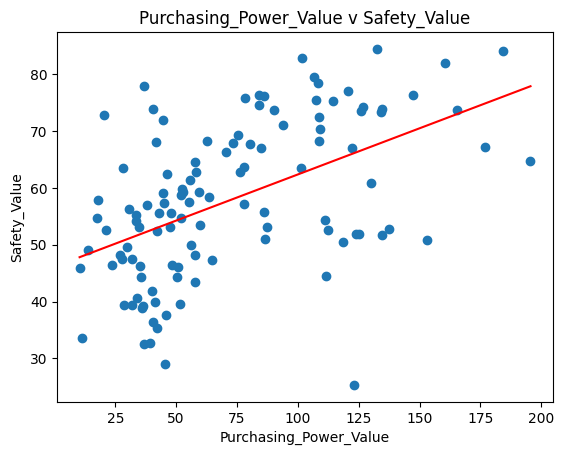

In [332]:
plt.title("Purchasing_Power_Value v Safety_Value")
plt.xlabel("Purchasing_Power_Value")
plt.ylabel("Safety_Value")
plt.scatter(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Safety_Value)
plt.plot(np.unique(CountryData_Clean.Purchasing_Power_Value), np.poly1d(np.polyfit(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Safety_Value, 1))(np.unique(CountryData_Clean.Purchasing_Power_Value)), color='red')

In [333]:
corr = pearsonr(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Safety_Value)
print(corr)

PearsonRResult(statistic=np.float64(0.5060801438637846), pvalue=np.float64(9.245958121013248e-09))


In [334]:
data = sm.add_constant(CountryData_Clean['Purchasing_Power_Value'])
model = sm.OLS(CountryData_Clean['Safety_Value'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:           Safety_Value   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     38.56
Date:                Sun, 30 Mar 2025   Prob (F-statistic):           9.25e-09
Time:                        17:22:04   Log-Likelihood:                -441.95
No. Observations:                 114   AIC:                             887.9
Df Residuals:                     112   BIC:                             893.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     46

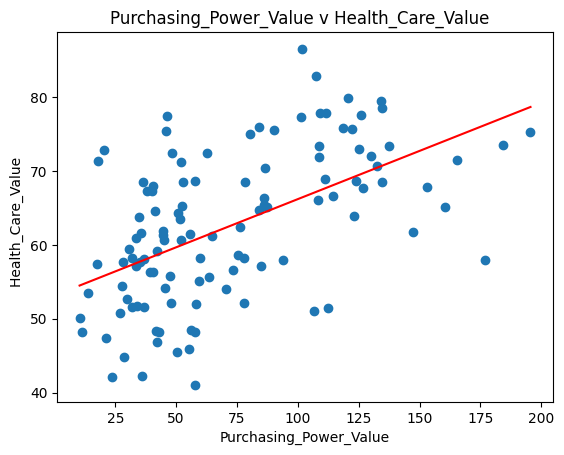

In [335]:
plt.title("Purchasing_Power_Value v Health_Care_Value  ")
plt.xlabel("Purchasing_Power_Value")
plt.ylabel("Health_Care_Value  ")
plt.scatter(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Health_Care_Value  )
plt.plot(np.unique(CountryData_Clean.Purchasing_Power_Value), np.poly1d(np.polyfit(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Health_Care_Value  , 1))(np.unique(CountryData_Clean.Purchasing_Power_Value)), color='red')

In [336]:
corr = pearsonr(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Health_Care_Value  )
print(corr)

PearsonRResult(statistic=np.float64(0.5422259883790206), pvalue=np.float64(4.636777286824102e-10))


In [337]:
data = sm.add_constant(CountryData_Clean['Purchasing_Power_Value'])
model = sm.OLS(CountryData_Clean['Health_Care_Value'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:      Health_Care_Value   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     46.64
Date:                Sun, 30 Mar 2025   Prob (F-statistic):           4.64e-10
Time:                        17:22:04   Log-Likelihood:                -406.19
No. Observations:                 114   AIC:                             816.4
Df Residuals:                     112   BIC:                             821.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     53

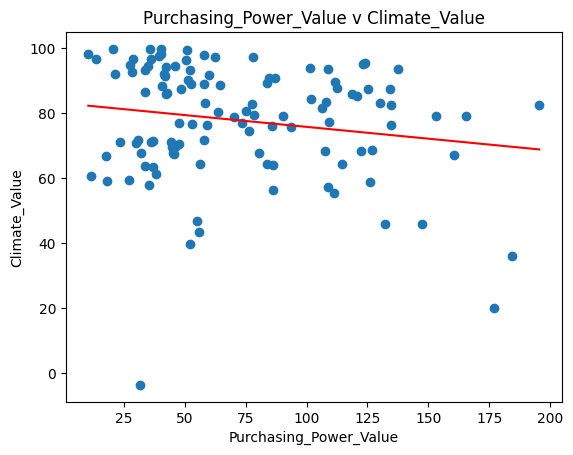

In [338]:
plt.title("Purchasing_Power_Value v Climate_Value")
plt.xlabel("Purchasing_Power_Value")
plt.ylabel("Climate_Value")
plt.scatter(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Climate_Value)
plt.plot(np.unique(CountryData_Clean.Purchasing_Power_Value), np.poly1d(np.polyfit(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Climate_Value  , 1))(np.unique(CountryData_Clean.Purchasing_Power_Value)), color='red')

In [339]:
corr = pearsonr(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Climate_Value)
print(corr)

PearsonRResult(statistic=np.float64(-0.1746699157153784), pvalue=np.float64(0.06306580352039508))


In [340]:
data = sm.add_constant(CountryData_Clean['Purchasing_Power_Value'])
model = sm.OLS(CountryData_Clean['Climate_Value'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:          Climate_Value   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     3.525
Date:                Sun, 30 Mar 2025   Prob (F-statistic):             0.0631
Time:                        17:22:04   Log-Likelihood:                -486.67
No. Observations:                 114   AIC:                             977.3
Df Residuals:                     112   BIC:                             982.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     83

AttributeError: 'DataFrame' object has no attribute 'Cost_of_Living_Value'

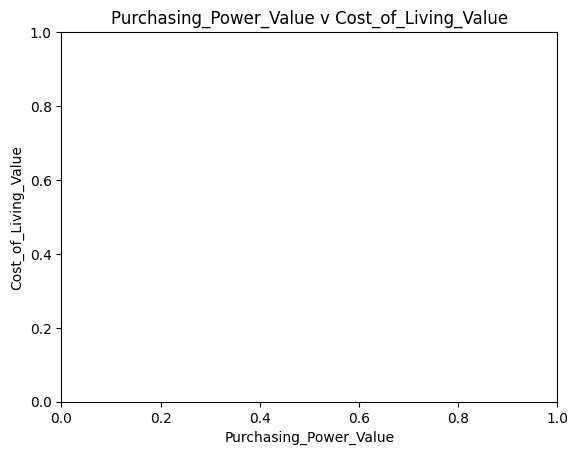

In [341]:
plt.title("Purchasing_Power_Value v Cost_of_Living_Value")
plt.xlabel("Purchasing_Power_Value")
plt.ylabel("Cost_of_Living_Value")
plt.scatter(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Cost_of_Living_Value)
plt.plot(np.unique(CountryData_Clean.Purchasing_Power_Value), np.poly1d(np.polyfit(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Cost_of_Living_Value, 1))(np.unique(CountryData_Clean.Purchasing_Power_Value)), color='red')

In [ ]:
corr = pearsonr(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Cost_of_Living_Value  )
print(corr)

PearsonRResult(statistic=np.float64(0.7075747446782333), pvalue=np.float64(1.358205960409214e-18))


In [ ]:
data = sm.add_constant(CountryData_Clean['Purchasing_Power_Value'])
model = sm.OLS(CountryData_Clean['Cost_of_Living_Value'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                             OLS Regression Results                             
Dep. Variable:     Cost_of_Living_Value   R-squared:                       0.501
Model:                              OLS   Adj. R-squared:                  0.496
Method:                   Least Squares   F-statistic:                     112.3
Date:                  Sun, 30 Mar 2025   Prob (F-statistic):           1.36e-18
Time:                          17:07:57   Log-Likelihood:                -433.14
No. Observations:                   114   AIC:                             870.3
Df Residuals:                       112   BIC:                             875.7
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const   

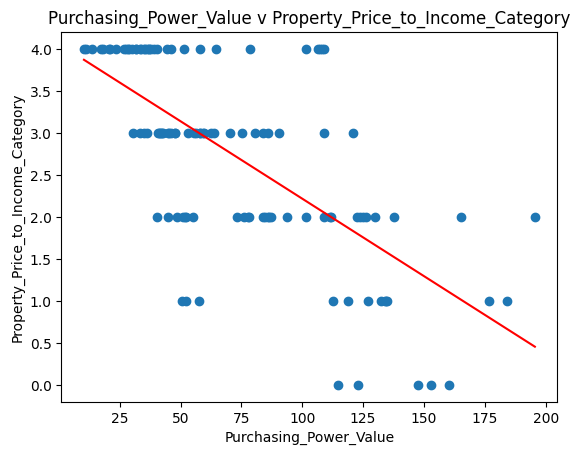

In [ ]:
plt.title("Purchasing_Power_Value v Property_Price_to_Income_Category")
plt.xlabel("Purchasing_Power_Value")
plt.ylabel("Property_Price_to_Income_Category")
plt.scatter(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Property_Price_to_Income_Category)
plt.plot(np.unique(CountryData_Clean.Purchasing_Power_Value), np.poly1d(np.polyfit(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Property_Price_to_Income_Category, 1))(np.unique(CountryData_Clean.Purchasing_Power_Value)), color='red')

In [ ]:
corr = pearsonr(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Property_Price_to_Income_Category  )
print(corr)

PearsonRResult(statistic=np.float64(-0.6811101561014372), pvalue=np.float64(7.518140811180776e-17))


In [ ]:
data = sm.add_constant(CountryData_Clean['Purchasing_Power_Value'])
model = sm.OLS(CountryData_Clean['Property_Price_to_Income_Category'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                                    OLS Regression Results                                   
Dep. Variable:     Property_Price_to_Income_Category   R-squared:                       0.464
Model:                                           OLS   Adj. R-squared:                  0.459
Method:                                Least Squares   F-statistic:                     96.92
Date:                               Sun, 30 Mar 2025   Prob (F-statistic):           7.52e-17
Time:                                       17:07:57   Log-Likelihood:                -141.49
No. Observations:                                114   AIC:                             287.0
Df Residuals:                                    112   BIC:                             292.5
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
                             coef    std err          t     

In [ ]:
data = sm.add_constant(CountryData_Clean['Purchasing_Power_Value'])
model = sm.OLS(CountryData_Clean['Cost_of_Living_Value'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                             OLS Regression Results                             
Dep. Variable:     Cost_of_Living_Value   R-squared:                       0.501
Model:                              OLS   Adj. R-squared:                  0.496
Method:                   Least Squares   F-statistic:                     112.3
Date:                  Sun, 30 Mar 2025   Prob (F-statistic):           1.36e-18
Time:                          17:07:57   Log-Likelihood:                -433.14
No. Observations:                   114   AIC:                             870.3
Df Residuals:                       112   BIC:                             875.7
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const   

AttributeError: 'DataFrame' object has no attribute 'Traffic_Commute_Time_Value'

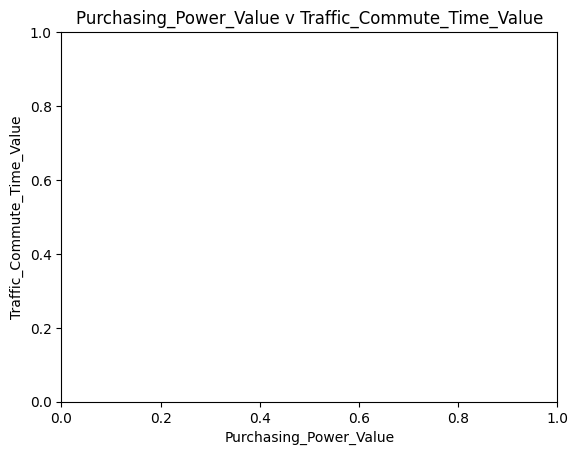

In [ ]:
plt.title("Purchasing_Power_Value v Traffic_Commute_Time_Value")
plt.xlabel("Purchasing_Power_Value")
plt.ylabel("Traffic_Commute_Time_Value")
plt.scatter(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Traffic_Commute_Time_Value)
plt.plot(np.unique(CountryData_Clean.Purchasing_Power_Value), np.poly1d(np.polyfit(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Traffic_Commute_Time_Value, 1))(np.unique(CountryData_Clean.Purchasing_Power_Value)), color='red')

In [ ]:
corr = pearsonr(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Traffic_Commute_Time_Value  )
print(corr)

PearsonRResult(statistic=np.float64(-0.42073499165001366), pvalue=np.float64(3.147743378617818e-06))


In [ ]:
data = sm.add_constant(CountryData_Clean['Purchasing_Power_Value'])
model = sm.OLS(CountryData_Clean['Traffic_Commute_Time_Value'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                                OLS Regression Results                                
Dep. Variable:     Traffic_Commute_Time_Value   R-squared:                       0.177
Model:                                    OLS   Adj. R-squared:                  0.170
Method:                         Least Squares   F-statistic:                     24.09
Date:                        Wed, 26 Mar 2025   Prob (F-statistic):           3.15e-06
Time:                                16:13:01   Log-Likelihood:                -405.68
No. Observations:                         114   AIC:                             815.4
Df Residuals:                             112   BIC:                             820.8
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

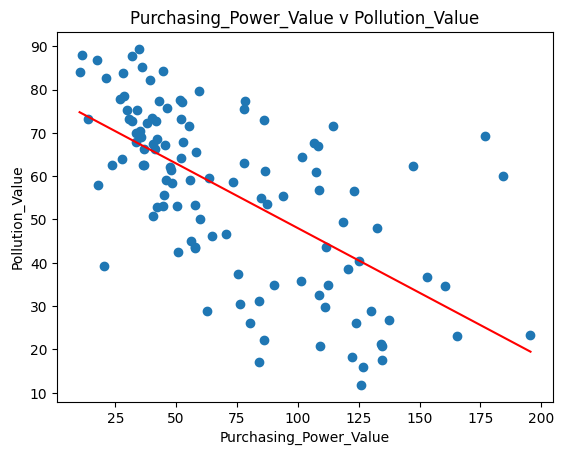

In [ ]:
plt.title("Purchasing_Power_Value v Pollution_Value")
plt.xlabel("Purchasing_Power_Value")
plt.ylabel("Pollution_Value")
plt.scatter(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Pollution_Value)
plt.plot(np.unique(CountryData_Clean.Purchasing_Power_Value), np.poly1d(np.polyfit(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Pollution_Value, 1))(np.unique(CountryData_Clean.Purchasing_Power_Value)), color='red')

In [ ]:
corr = pearsonr(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Pollution_Value  )
print(corr)

PearsonRResult(statistic=np.float64(-0.6340611729046027), pvalue=np.float64(3.652884030949703e-14))


In [ ]:
data = sm.add_constant(CountryData_Clean['Purchasing_Power_Value'])
model = sm.OLS(CountryData_Clean['Pollution_Value'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:        Pollution_Value   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     75.30
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           3.65e-14
Time:                        16:13:21   Log-Likelihood:                -473.29
No. Observations:                 114   AIC:                             950.6
Df Residuals:                     112   BIC:                             956.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     77

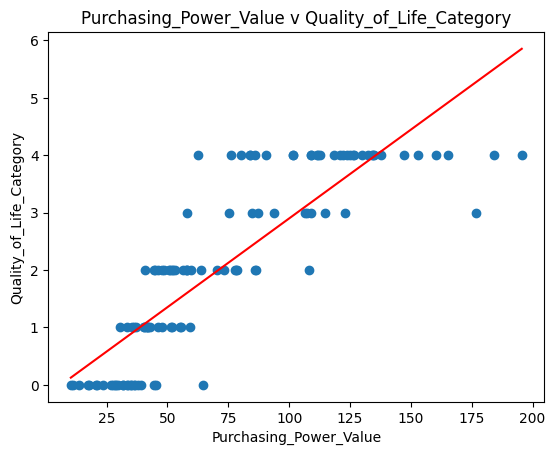

In [ ]:
plt.title("Purchasing_Power_Value v Quality_of_Life_Category")
plt.xlabel("Purchasing_Power_Value")
plt.ylabel("Quality_of_Life_Category")
plt.scatter(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Quality_of_Life_Category)
plt.plot(np.unique(CountryData_Clean.Purchasing_Power_Value), np.poly1d(np.polyfit(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Quality_of_Life_Category, 1))(np.unique(CountryData_Clean.Purchasing_Power_Value)), color='red')

In [ ]:
corr = pearsonr(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Pollution_Value  )
print(corr)

PearsonRResult(statistic=np.float64(-0.6340611729046027), pvalue=np.float64(3.652884030949703e-14))


In [ ]:
data = sm.add_constant(CountryData_Clean['Purchasing_Power_Value'])
model = sm.OLS(CountryData_Clean['Pollution_Value'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:        Pollution_Value   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     75.30
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           3.65e-14
Time:                        16:13:56   Log-Likelihood:                -473.29
No. Observations:                 114   AIC:                             950.6
Df Residuals:                     112   BIC:                             956.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     77

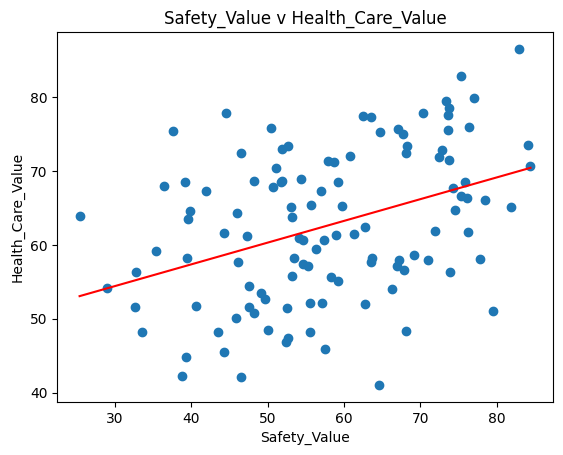

In [ ]:
plt.title("Safety_Value v Health_Care_Value")
plt.xlabel("Safety_Value")
plt.ylabel("Health_Care_Value")
plt.scatter(CountryData_Clean.Safety_Value, CountryData_Clean.Health_Care_Value)
plt.plot(np.unique(CountryData_Clean.Safety_Value), np.poly1d(np.polyfit(CountryData_Clean.Safety_Value, CountryData_Clean.Health_Care_Value, 1))(np.unique(CountryData_Clean.Safety_Value)), color='red')

In [ ]:
corr = pearsonr(CountryData_Clean.Safety_Value, CountryData_Clean.Health_Care_Value)
print(corr)

PearsonRResult(statistic=np.float64(0.3918168457636466), pvalue=np.float64(1.624973222576402e-05))


In [ ]:
data = sm.add_constant(CountryData_Clean['Safety_Value'])
model = sm.OLS(CountryData_Clean['Health_Care_Value'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:      Health_Care_Value   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     20.31
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           1.62e-05
Time:                        16:14:17   Log-Likelihood:                -416.53
No. Observations:                 114   AIC:                             837.1
Df Residuals:                     112   BIC:                             842.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           45.5866      3.878     11.756   

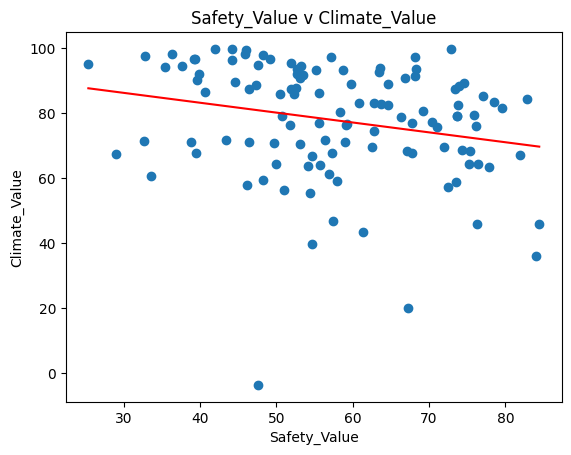

In [ ]:
plt.title("Safety_Value v Climate_Value")
plt.xlabel("Safety_Value")
plt.ylabel("Climate_Value")
plt.scatter(CountryData_Clean.Safety_Value, CountryData_Clean.Climate_Value)
plt.plot(np.unique(CountryData_Clean.Safety_Value), np.poly1d(np.polyfit(CountryData_Clean.Safety_Value, CountryData_Clean.Climate_Value, 1))(np.unique(CountryData_Clean.Safety_Value)), color='red')

In [ ]:
corr = pearsonr(CountryData_Clean.Safety_Value, CountryData_Clean.Climate_Value)
print(corr)

PearsonRResult(statistic=np.float64(-0.23445977013459385), pvalue=np.float64(0.012043769059064003))


In [ ]:
data = sm.add_constant(CountryData_Clean['Safety_Value'])
model = sm.OLS(CountryData_Clean['Climate_Value'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:          Climate_Value   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     6.515
Date:                Wed, 26 Mar 2025   Prob (F-statistic):             0.0120
Time:                        16:17:35   Log-Likelihood:                -485.22
No. Observations:                 114   AIC:                             974.4
Df Residuals:                     112   BIC:                             979.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           95.4398      7.083     13.474   

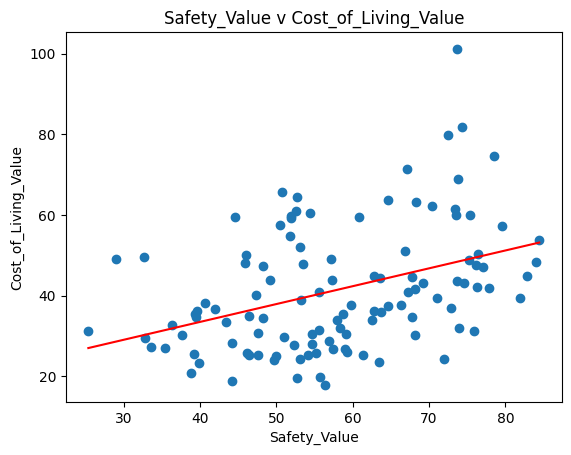

In [ ]:
plt.title("Safety_Value v Cost_of_Living_Value")
plt.xlabel("Safety_Value")
plt.ylabel("Cost_of_Living_Value")
plt.scatter(CountryData_Clean.Safety_Value, CountryData_Clean.Cost_of_Living_Value)
plt.plot(np.unique(CountryData_Clean.Safety_Value), np.poly1d(np.polyfit(CountryData_Clean.Safety_Value, CountryData_Clean.Cost_of_Living_Value, 1))(np.unique(CountryData_Clean.Safety_Value)), color='red')

In [ ]:
corr = pearsonr(CountryData_Clean.Safety_Value, CountryData_Clean.Cost_of_Living_Value)
print(corr)

PearsonRResult(statistic=np.float64(0.3918365147466791), pvalue=np.float64(1.6232432059722912e-05))


In [ ]:
data = sm.add_constant(CountryData_Clean['Safety_Value'])
model = sm.OLS(CountryData_Clean['Cost_of_Living_Value'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                             OLS Regression Results                             
Dep. Variable:     Cost_of_Living_Value   R-squared:                       0.154
Model:                              OLS   Adj. R-squared:                  0.146
Method:                   Least Squares   F-statistic:                     20.32
Date:                  Wed, 26 Mar 2025   Prob (F-statistic):           1.62e-05
Time:                          16:17:43   Log-Likelihood:                -463.22
No. Observations:                   114   AIC:                             930.4
Df Residuals:                       112   BIC:                             935.9
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           15.7784     

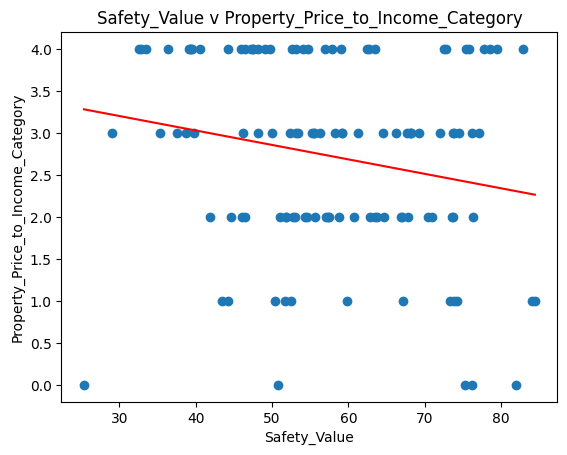

In [ ]:
plt.title("Safety_Value v Property_Price_to_Income_Category")
plt.xlabel("Safety_Value")
plt.ylabel("Property_Price_to_Income_Category")
plt.scatter(CountryData_Clean.Safety_Value, CountryData_Clean.Property_Price_to_Income_Category)
plt.plot(np.unique(CountryData_Clean.Safety_Value), np.poly1d(np.polyfit(CountryData_Clean.Safety_Value, CountryData_Clean.Property_Price_to_Income_Category, 1))(np.unique(CountryData_Clean.Safety_Value)), color='red')

In [ ]:
corr = pearsonr(CountryData_Clean.Safety_Value, CountryData_Clean.Property_Price_to_Income_Category)
print(corr)

PearsonRResult(statistic=np.float64(-0.2038059434430764), pvalue=np.float64(0.02963367995884605))


In [ ]:
data = sm.add_constant(CountryData_Clean['Safety_Value'])
model = sm.OLS(CountryData_Clean['Property_Price_to_Income_Category'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                                    OLS Regression Results                                   
Dep. Variable:     Property_Price_to_Income_Category   R-squared:                       0.042
Model:                                           OLS   Adj. R-squared:                  0.033
Method:                                Least Squares   F-statistic:                     4.854
Date:                               Wed, 26 Mar 2025   Prob (F-statistic):             0.0296
Time:                                       16:18:03   Log-Likelihood:                -174.61
No. Observations:                                114   AIC:                             353.2
Df Residuals:                                    112   BIC:                             358.7
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
                   coef    std err          t      P>|t|    

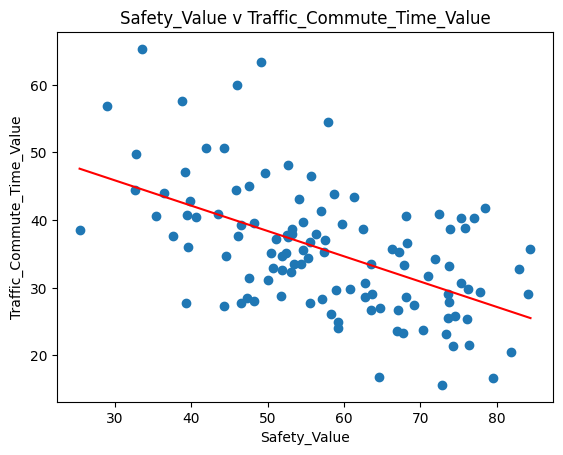

In [ ]:
plt.title("Safety_Value v Traffic_Commute_Time_Value")
plt.xlabel("Safety_Value")
plt.ylabel("Traffic_Commute_Time_Value")
plt.scatter(CountryData_Clean.Safety_Value, CountryData_Clean.Traffic_Commute_Time_Value)
plt.plot(np.unique(CountryData_Clean.Safety_Value), np.poly1d(np.polyfit(CountryData_Clean.Safety_Value, CountryData_Clean.Traffic_Commute_Time_Value, 1))(np.unique(CountryData_Clean.Safety_Value)), color='red')

In [ ]:
corr = pearsonr(CountryData_Clean.Safety_Value, CountryData_Clean.Traffic_Commute_Time_Value)
print(corr)

PearsonRResult(statistic=np.float64(-0.5403821411053155), pvalue=np.float64(5.448579521747275e-10))


In [ ]:
data = sm.add_constant(CountryData_Clean['Safety_Value'])
model = sm.OLS(CountryData_Clean['Traffic_Commute_Time_Value'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                                OLS Regression Results                                
Dep. Variable:     Traffic_Commute_Time_Value   R-squared:                       0.292
Model:                                    OLS   Adj. R-squared:                  0.286
Method:                         Least Squares   F-statistic:                     46.19
Date:                        Wed, 26 Mar 2025   Prob (F-statistic):           5.45e-10
Time:                                16:34:16   Log-Likelihood:                -397.10
No. Observations:                         114   AIC:                             798.2
Df Residuals:                             112   BIC:                             803.7
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

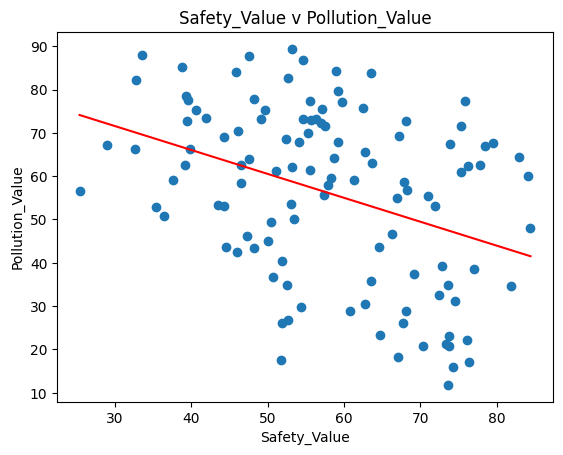

In [ ]:
plt.title("Safety_Value v Pollution_Value")
plt.xlabel("Safety_Value")
plt.ylabel("Pollution_Value")
plt.scatter(CountryData_Clean.Safety_Value, CountryData_Clean.Pollution_Value)
plt.plot(np.unique(CountryData_Clean.Safety_Value), np.poly1d(np.polyfit(CountryData_Clean.Safety_Value, CountryData_Clean.Pollution_Value, 1))(np.unique(CountryData_Clean.Safety_Value)), color='red')

In [ ]:
corr = pearsonr(CountryData_Clean.Safety_Value, CountryData_Clean.Pollution_Value)
print(corr)

PearsonRResult(statistic=np.float64(-0.3759620619750392), pvalue=np.float64(3.7523245542248426e-05))


In [ ]:
data = sm.add_constant(CountryData_Clean['Safety_Value'])
model = sm.OLS(CountryData_Clean['Pollution_Value'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:        Pollution_Value   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     18.44
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           3.75e-05
Time:                        16:35:15   Log-Likelihood:                -493.92
No. Observations:                 114   AIC:                             991.8
Df Residuals:                     112   BIC:                             997.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           88.1193      7.645     11.526   

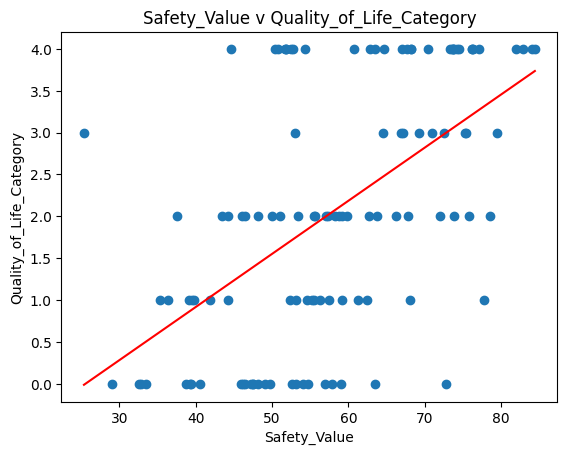

In [ ]:
plt.title("Safety_Value v Quality_of_Life_Category")
plt.xlabel("Safety_Value")
plt.ylabel("Quality_of_Life_Category")
plt.scatter(CountryData_Clean.Safety_Value, CountryData_Clean.Quality_of_Life_Category)
plt.plot(np.unique(CountryData_Clean.Safety_Value), np.poly1d(np.polyfit(CountryData_Clean.Safety_Value, CountryData_Clean.Quality_of_Life_Category, 1))(np.unique(CountryData_Clean.Safety_Value)), color='red')

In [ ]:
corr = pearsonr(CountryData_Clean.Safety_Value, CountryData_Clean.Quality_of_Life_Category)
print(corr)

PearsonRResult(statistic=np.float64(0.5625512679640756), pvalue=np.float64(7.327617397352622e-11))


In [ ]:
data = sm.add_constant(CountryData_Clean['Safety_Value'])
model = sm.OLS(CountryData_Clean['Quality_of_Life_Category'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                               OLS Regression Results                               
Dep. Variable:     Quality_of_Life_Category   R-squared:                       0.316
Model:                                  OLS   Adj. R-squared:                  0.310
Method:                       Least Squares   F-statistic:                     51.85
Date:                      Wed, 26 Mar 2025   Prob (F-statistic):           7.33e-11
Time:                              16:35:23   Log-Likelihood:                -188.30
No. Observations:                       114   AIC:                             380.6
Df Residuals:                           112   BIC:                             386.1
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

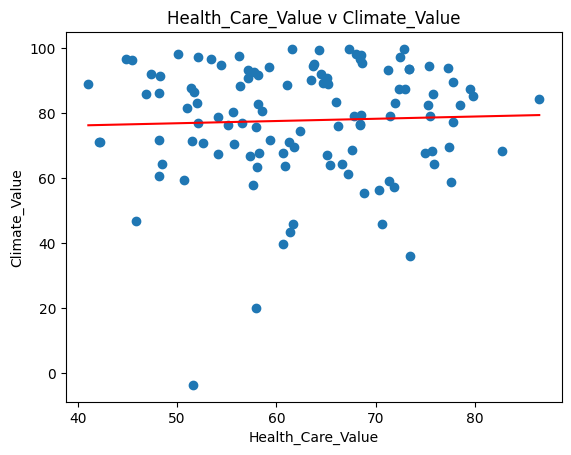

In [ ]:
plt.title("Health_Care_Value v Climate_Value")
plt.xlabel("Health_Care_Value")
plt.ylabel("Climate_Value")
plt.scatter(CountryData_Clean.Health_Care_Value, CountryData_Clean.Climate_Value)
plt.plot(np.unique(CountryData_Clean.Health_Care_Value), np.poly1d(np.polyfit(CountryData_Clean.Health_Care_Value, CountryData_Clean.Climate_Value, 1))(np.unique(CountryData_Clean.Health_Care_Value)), color='red')

In [ ]:
corr = pearsonr(CountryData_Clean.Health_Care_Value, CountryData_Clean.Climate_Value)
print(corr)

PearsonRResult(statistic=np.float64(0.039961685271058464), pvalue=np.float64(0.6729224523957572))


In [ ]:
data = sm.add_constant(CountryData_Clean['Health_Care_Value'])
model = sm.OLS(CountryData_Clean['Climate_Value'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:          Climate_Value   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     6.515
Date:                Wed, 26 Mar 2025   Prob (F-statistic):             0.0120
Time:                        16:35:33   Log-Likelihood:                -485.22
No. Observations:                 114   AIC:                             974.4
Df Residuals:                     112   BIC:                             979.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           95.4398      7.083     13.474   

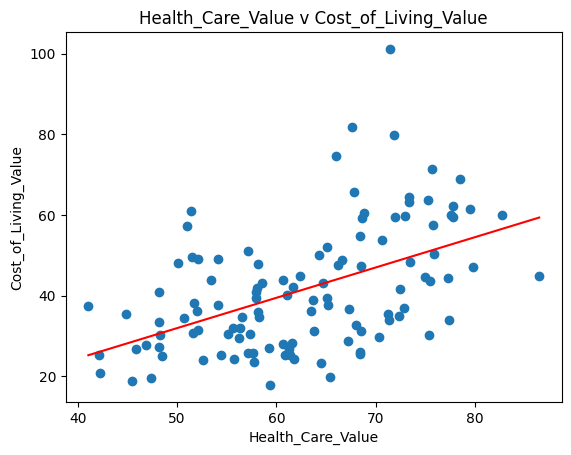

In [ ]:
plt.title("Health_Care_Value v Cost_of_Living_Value")
plt.xlabel("Health_Care_Value")
plt.ylabel("Cost_of_Living_Value")
plt.scatter(CountryData_Clean.Health_Care_Value, CountryData_Clean.Cost_of_Living_Value)
plt.plot(np.unique(CountryData_Clean.Health_Care_Value), np.poly1d(np.polyfit(CountryData_Clean.Health_Care_Value, CountryData_Clean.Cost_of_Living_Value, 1))(np.unique(CountryData_Clean.Health_Care_Value)), color='red')

In [ ]:
corr = pearsonr(CountryData_Clean.Health_Care_Value, CountryData_Clean.Cost_of_Living_Value)
print(corr)

PearsonRResult(statistic=np.float64(0.49849959655349196), pvalue=np.float64(1.6588510109311365e-08))


In [ ]:
data = sm.add_constant(CountryData_Clean['Health_Care_Value'])
model = sm.OLS(CountryData_Clean['Cost_of_Living_Value'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                             OLS Regression Results                             
Dep. Variable:     Cost_of_Living_Value   R-squared:                       0.249
Model:                              OLS   Adj. R-squared:                  0.242
Method:                   Least Squares   F-statistic:                     37.04
Date:                  Wed, 26 Mar 2025   Prob (F-statistic):           1.66e-08
Time:                          16:38:12   Log-Likelihood:                -456.44
No. Observations:                   114   AIC:                             916.9
Df Residuals:                       112   BIC:                             922.4
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             

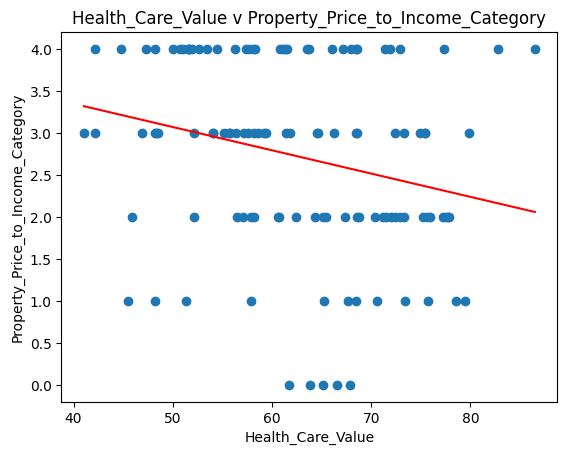

In [ ]:
plt.title("Health_Care_Value v Property_Price_to_Income_Category")
plt.xlabel("Health_Care_Value")
plt.ylabel("Property_Price_to_Income_Category")
plt.scatter(CountryData_Clean.Health_Care_Value, CountryData_Clean.Property_Price_to_Income_Category)
plt.plot(np.unique(CountryData_Clean.Health_Care_Value), np.poly1d(np.polyfit(CountryData_Clean.Health_Care_Value, CountryData_Clean.Property_Price_to_Income_Category, 1))(np.unique(CountryData_Clean.Health_Care_Value)), color='red')

In [ ]:
corr = pearsonr(CountryData_Clean.Health_Care_Value, CountryData_Clean.Property_Price_to_Income_Category)
print(corr)

PearsonRResult(statistic=np.float64(-0.24617233117650433), pvalue=np.float64(0.008285830674806316))


In [ ]:
data = sm.add_constant(CountryData_Clean['Health_Care_Value'])
model = sm.OLS(CountryData_Clean['Property_Price_to_Income_Category'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

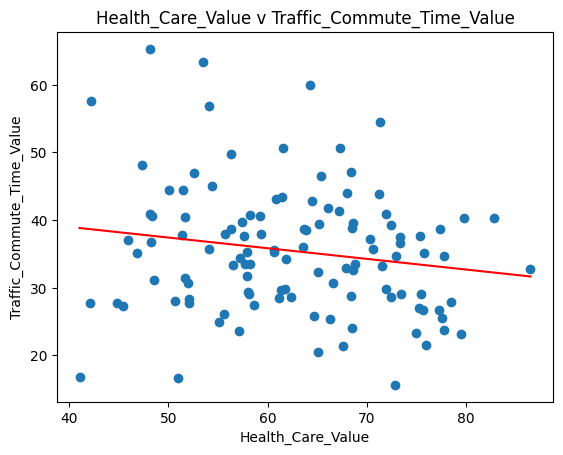

In [ ]:
plt.title("Health_Care_Value v Traffic_Commute_Time_Value")
plt.xlabel("Health_Care_Value")
plt.ylabel("Traffic_Commute_Time_Value")
plt.scatter(CountryData_Clean.Health_Care_Value, CountryData_Clean.Traffic_Commute_Time_Value)
plt.plot(np.unique(CountryData_Clean.Health_Care_Value), np.poly1d(np.polyfit(CountryData_Clean.Health_Care_Value, CountryData_Clean.Traffic_Commute_Time_Value, 1))(np.unique(CountryData_Clean.Health_Care_Value)), color='red')

In [ ]:
corr = pearsonr(CountryData_Clean.Health_Care_Value, CountryData_Clean.Traffic_Commute_Time_Value)
print(corr)

PearsonRResult(statistic=np.float64(-0.1708406258786923), pvalue=np.float64(0.06916180270818367))


In [ ]:
data = sm.add_constant(CountryData_Clean['Health_Care_Value'])
model = sm.OLS(CountryData_Clean['Traffic_Commute_Time_Value'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                                OLS Regression Results                                
Dep. Variable:     Traffic_Commute_Time_Value   R-squared:                       0.029
Model:                                    OLS   Adj. R-squared:                  0.021
Method:                         Least Squares   F-statistic:                     3.367
Date:                        Wed, 26 Mar 2025   Prob (F-statistic):             0.0692
Time:                                16:38:28   Log-Likelihood:                -415.09
No. Observations:                         114   AIC:                             834.2
Df Residuals:                             112   BIC:                             839.7
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

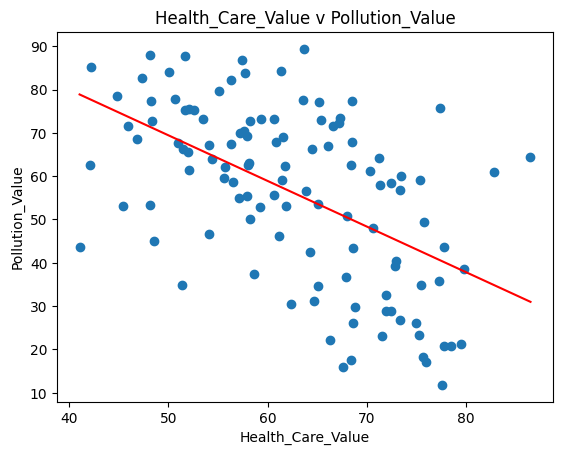

In [ ]:
plt.title("Health_Care_Value v Pollution_Value")
plt.xlabel("Health_Care_Value")
plt.ylabel("Pollution_Value")
plt.scatter(CountryData_Clean.Health_Care_Value, CountryData_Clean.Pollution_Value)
plt.plot(np.unique(CountryData_Clean.Health_Care_Value), np.poly1d(np.polyfit(CountryData_Clean.Health_Care_Value, CountryData_Clean.Pollution_Value, 1))(np.unique(CountryData_Clean.Health_Care_Value)), color='red')

In [ ]:
corr = pearsonr(CountryData_Clean.Health_Care_Value, CountryData_Clean.Pollution_Value)
print(corr)

PearsonRResult(statistic=np.float64(-0.5382175975564419), pvalue=np.float64(6.576559552648007e-10))


In [ ]:
data = sm.add_constant(CountryData_Clean['Health_Care_Value'])
model = sm.OLS(CountryData_Clean['Pollution_Value'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:        Pollution_Value   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     45.68
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           6.58e-10
Time:                        16:38:37   Log-Likelihood:                -483.11
No. Observations:                 114   AIC:                             970.2
Df Residuals:                     112   BIC:                             975.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               122.1132      9.88

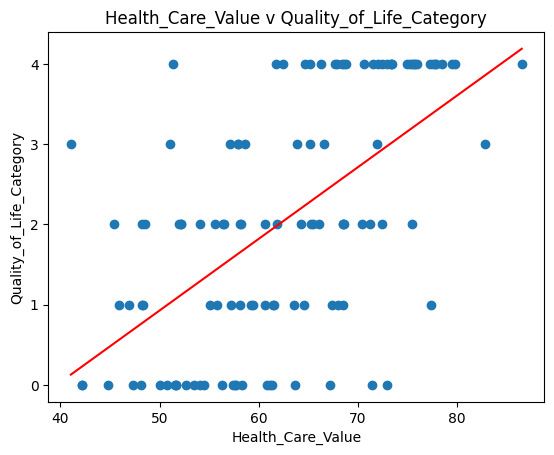

In [ ]:
plt.title("Health_Care_Value v Quality_of_Life_Category")
plt.xlabel("Health_Care_Value")
plt.ylabel("Quality_of_Life_Category")
plt.scatter(CountryData_Clean.Health_Care_Value, CountryData_Clean.Quality_of_Life_Category)
plt.plot(np.unique(CountryData_Clean.Health_Care_Value), np.poly1d(np.polyfit(CountryData_Clean.Health_Care_Value, CountryData_Clean.Quality_of_Life_Category, 1))(np.unique(CountryData_Clean.Health_Care_Value)), color='red')

In [ ]:
corr = pearsonr(CountryData_Clean.Health_Care_Value, CountryData_Clean.Quality_of_Life_Category)
print(corr)

PearsonRResult(statistic=np.float64(0.5945151993982958), pvalue=np.float64(3.0850799847623145e-12))


In [ ]:
data = sm.add_constant(CountryData_Clean['Health_Care_Value'])
model = sm.OLS(CountryData_Clean['Quality_of_Life_Category'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                               OLS Regression Results                               
Dep. Variable:     Quality_of_Life_Category   R-squared:                       0.353
Model:                                  OLS   Adj. R-squared:                  0.348
Method:                       Least Squares   F-statistic:                     61.23
Date:                      Wed, 26 Mar 2025   Prob (F-statistic):           3.09e-12
Time:                              16:38:48   Log-Likelihood:                -185.13
No. Observations:                       114   AIC:                             374.3
Df Residuals:                           112   BIC:                             379.7
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

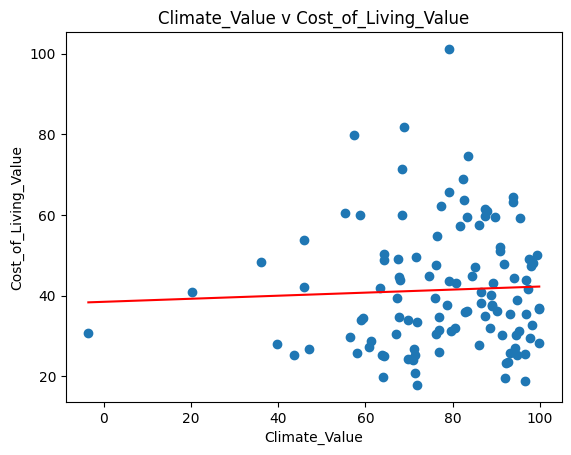

In [ ]:
plt.title("Climate_Value v Cost_of_Living_Value")
plt.xlabel("Climate_Value")
plt.ylabel("Cost_of_Living_Value")
plt.scatter(CountryData_Clean.Climate_Value, CountryData_Clean.Cost_of_Living_Value)
plt.plot(np.unique(CountryData_Clean.Climate_Value), np.poly1d(np.polyfit(CountryData_Clean.Climate_Value, CountryData_Clean.Cost_of_Living_Value, 1))(np.unique(CountryData_Clean.Climate_Value)), color='red')

In [ ]:
corr = pearsonr(CountryData_Clean.Climate_Value, CountryData_Clean.Cost_of_Living_Value)
print(corr)

PearsonRResult(statistic=np.float64(0.04345262466928303), pvalue=np.float64(0.6461975357769183))


In [ ]:
data = sm.add_constant(CountryData_Clean['Climate_Value'])
model = sm.OLS(CountryData_Clean['Cost_of_Living_Value'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                             OLS Regression Results                             
Dep. Variable:     Cost_of_Living_Value   R-squared:                       0.002
Model:                              OLS   Adj. R-squared:                 -0.007
Method:                   Least Squares   F-statistic:                    0.2119
Date:                  Wed, 26 Mar 2025   Prob (F-statistic):              0.646
Time:                          16:39:04   Log-Likelihood:                -472.62
No. Observations:                   114   AIC:                             949.2
Df Residuals:                       112   BIC:                             954.7
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            38.4645  

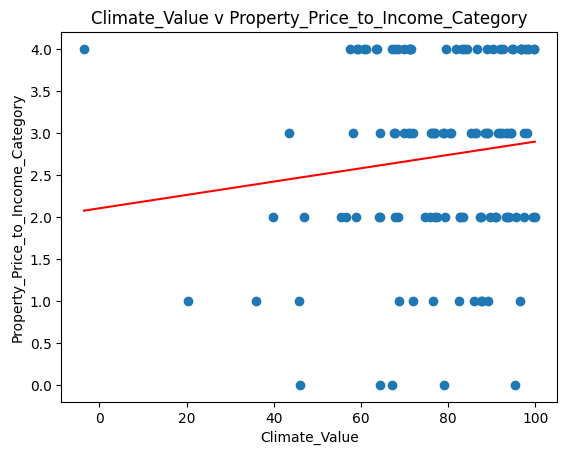

In [ ]:
plt.title("Climate_Value v Property_Price_to_Income_Category")
plt.xlabel("Climate_Value")
plt.ylabel("Property_Price_to_Income_Category")
plt.scatter(CountryData_Clean.Climate_Value, CountryData_Clean.Property_Price_to_Income_Category)
plt.plot(np.unique(CountryData_Clean.Climate_Value), np.poly1d(np.polyfit(CountryData_Clean.Climate_Value, CountryData_Clean.Property_Price_to_Income_Category, 1))(np.unique(CountryData_Clean.Climate_Value)), color='red')

In [ ]:
corr = pearsonr(CountryData_Clean.Climate_Value, CountryData_Clean.Property_Price_to_Income_Category)
print(corr)

PearsonRResult(statistic=np.float64(0.12198548291056707), pvalue=np.float64(0.19603557595918517))


In [ ]:
data = sm.add_constant(CountryData_Clean['Climate_Value'])
model = sm.OLS(CountryData_Clean['Property_Price_to_Income_Category'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                                    OLS Regression Results                                   
Dep. Variable:     Property_Price_to_Income_Category   R-squared:                       0.015
Model:                                           OLS   Adj. R-squared:                  0.006
Method:                                Least Squares   F-statistic:                     1.692
Date:                               Wed, 26 Mar 2025   Prob (F-statistic):              0.196
Time:                                       16:39:11   Log-Likelihood:                -176.17
No. Observations:                                114   AIC:                             356.3
Df Residuals:                                    112   BIC:                             361.8
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
                    coef    std err          t      P>|t|   

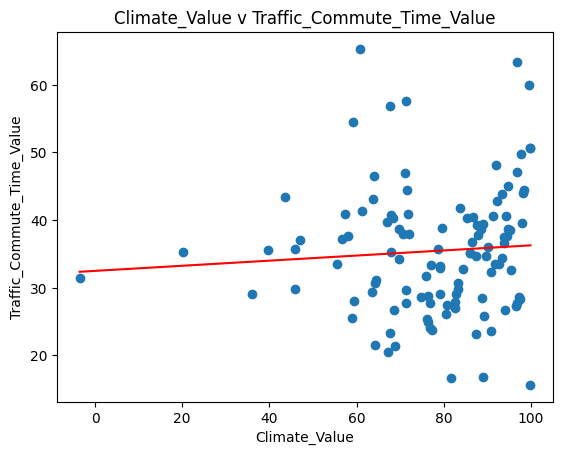

In [ ]:
plt.title("Climate_Value v Traffic_Commute_Time_Value")
plt.xlabel("Climate_Value")
plt.ylabel("Traffic_Commute_Time_Value")
plt.scatter(CountryData_Clean.Climate_Value, CountryData_Clean.Traffic_Commute_Time_Value)
plt.plot(np.unique(CountryData_Clean.Climate_Value), np.poly1d(np.polyfit(CountryData_Clean.Climate_Value, CountryData_Clean.Traffic_Commute_Time_Value, 1))(np.unique(CountryData_Clean.Climate_Value)), color='red')

In [ ]:
corr = pearsonr(CountryData_Clean.Climate_Value, CountryData_Clean.Traffic_Commute_Time_Value)
print(corr)

PearsonRResult(statistic=np.float64(0.07073635603171678), pvalue=np.float64(0.45453754237492827))


In [ ]:
data = sm.add_constant(CountryData_Clean['Climate_Value'])
model = sm.OLS(CountryData_Clean['Traffic_Commute_Time_Value'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                                OLS Regression Results                                
Dep. Variable:     Traffic_Commute_Time_Value   R-squared:                       0.005
Model:                                    OLS   Adj. R-squared:                 -0.004
Method:                         Least Squares   F-statistic:                    0.5632
Date:                        Thu, 27 Mar 2025   Prob (F-statistic):              0.455
Time:                                20:25:48   Log-Likelihood:                -416.50
No. Observations:                         114   AIC:                             837.0
Df Residuals:                             112   BIC:                             842.5
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

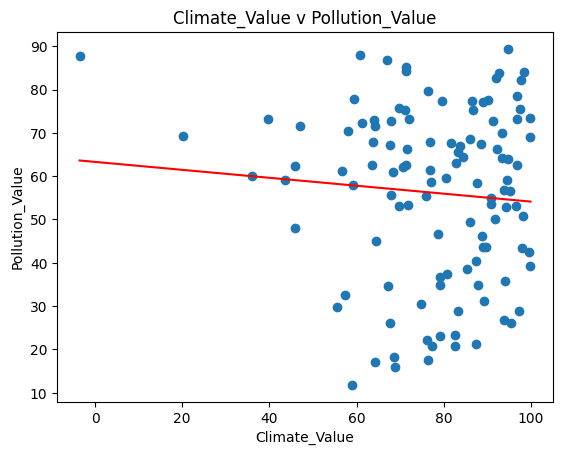

In [ ]:
plt.title("Climate_Value v Pollution_Value")
plt.xlabel("Climate_Value")
plt.ylabel("Pollution_Value")
plt.scatter(CountryData_Clean.Climate_Value, CountryData_Clean.Pollution_Value)
plt.plot(np.unique(CountryData_Clean.Climate_Value), np.poly1d(np.polyfit(CountryData_Clean.Climate_Value, CountryData_Clean.Pollution_Value, 1))(np.unique(CountryData_Clean.Climate_Value)), color='red')

In [ ]:
corr = pearsonr(CountryData_Clean.Climate_Value, CountryData_Clean.Pollution_Value)
print(corr)

PearsonRResult(statistic=np.float64(-0.08100242197575222), pvalue=np.float64(0.39158481754547225))


In [ ]:
data = sm.add_constant(CountryData_Clean['Climate_Value'])
model = sm.OLS(CountryData_Clean['Pollution_Value'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:        Pollution_Value   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.7397
Date:                Thu, 27 Mar 2025   Prob (F-statistic):              0.392
Time:                        20:25:53   Log-Likelihood:                -502.23
No. Observations:                 114   AIC:                             1008.
Df Residuals:                     112   BIC:                             1014.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            63.2935      8.509      7.438

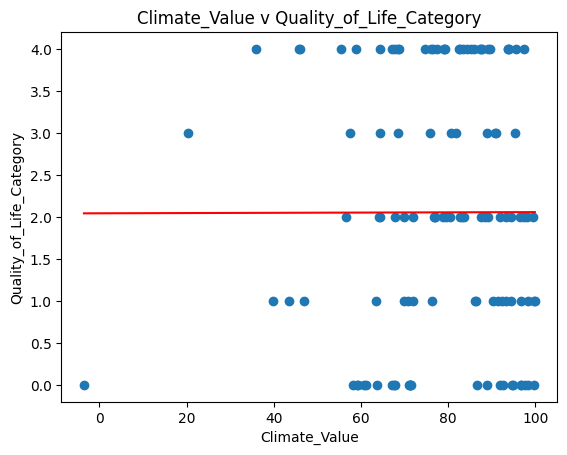

In [ ]:
plt.title("Climate_Value v Quality_of_Life_Category")
plt.xlabel("Climate_Value")
plt.ylabel("Quality_of_Life_Category")
plt.scatter(CountryData_Clean.Climate_Value, CountryData_Clean.Quality_of_Life_Category)
plt.plot(np.unique(CountryData_Clean.Climate_Value), np.poly1d(np.polyfit(CountryData_Clean.Climate_Value, CountryData_Clean.Quality_of_Life_Category, 1))(np.unique(CountryData_Clean.Climate_Value)), color='red')

In [ ]:
corr = pearsonr(CountryData_Clean.Climate_Value, CountryData_Clean.Quality_of_Life_Category)
print(corr)

PearsonRResult(statistic=np.float64(0.001646251399036739), pvalue=np.float64(0.9861307090944864))


In [ ]:
data = sm.add_constant(CountryData_Clean['Climate_Value'])
model = sm.OLS(CountryData_Clean['Quality_of_Life_Category'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                               OLS Regression Results                               
Dep. Variable:     Quality_of_Life_Category   R-squared:                       0.000
Model:                                  OLS   Adj. R-squared:                 -0.009
Method:                       Least Squares   F-statistic:                 0.0003035
Date:                      Wed, 26 Mar 2025   Prob (F-statistic):              0.986
Time:                              16:40:42   Log-Likelihood:                -209.99
No. Observations:                       114   AIC:                             424.0
Df Residuals:                           112   BIC:                             429.4
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

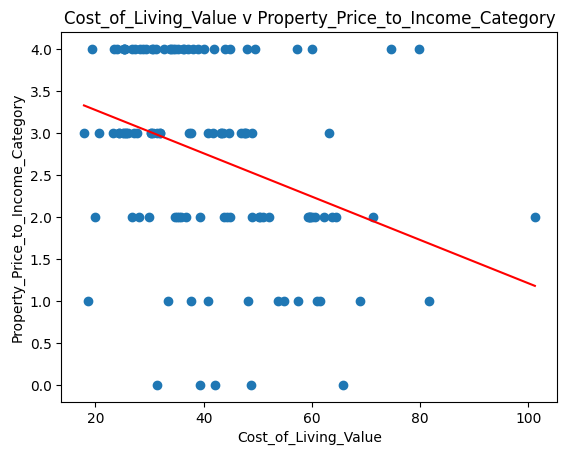

In [ ]:
plt.title("Cost_of_Living_Value v Property_Price_to_Income_Category")
plt.xlabel("Cost_of_Living_Value")
plt.ylabel("Property_Price_to_Income_Category")
plt.scatter(CountryData_Clean.Cost_of_Living_Value, CountryData_Clean.Property_Price_to_Income_Category)
plt.plot(np.unique(CountryData_Clean.Cost_of_Living_Value), np.poly1d(np.polyfit(CountryData_Clean.Cost_of_Living_Value, CountryData_Clean.Property_Price_to_Income_Category, 1))(np.unique(CountryData_Clean.Cost_of_Living_Value)), color='red')

In [ ]:
corr = pearsonr(CountryData_Clean.Cost_of_Living_Value, CountryData_Clean.Property_Price_to_Income_Category)
print(corr)

PearsonRResult(statistic=np.float64(-0.34516258255954085), pvalue=np.float64(0.00016924924780854357))


In [ ]:
data = sm.add_constant(CountryData_Clean['Cost_of_Living_Value'])
model = sm.OLS(CountryData_Clean['Property_Price_to_Income_Category'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                                    OLS Regression Results                                   
Dep. Variable:     Property_Price_to_Income_Category   R-squared:                       0.119
Model:                                           OLS   Adj. R-squared:                  0.111
Method:                                Least Squares   F-statistic:                     15.15
Date:                               Wed, 26 Mar 2025   Prob (F-statistic):           0.000169
Time:                                       16:40:53   Log-Likelihood:                -169.80
No. Observations:                                114   AIC:                             343.6
Df Residuals:                                    112   BIC:                             349.1
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
                           coef    std err          t      P

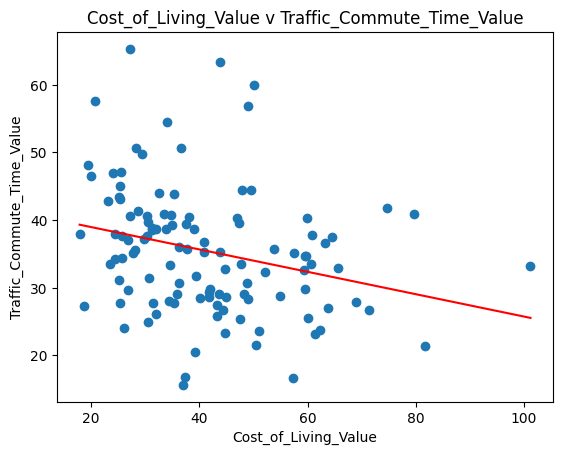

In [ ]:
plt.title("Cost_of_Living_Value v Traffic_Commute_Time_Value")
plt.xlabel("Cost_of_Living_Value")
plt.ylabel("Traffic_Commute_Time_Value")
plt.scatter(CountryData_Clean.Cost_of_Living_Value, CountryData_Clean.Traffic_Commute_Time_Value)
plt.plot(np.unique(CountryData_Clean.Cost_of_Living_Value), np.poly1d(np.polyfit(CountryData_Clean.Cost_of_Living_Value, CountryData_Clean.Traffic_Commute_Time_Value, 1))(np.unique(CountryData_Clean.Cost_of_Living_Value)), color='red')

In [ ]:
corr = pearsonr(CountryData_Clean.Cost_of_Living_Value, CountryData_Clean.Traffic_Commute_Time_Value)
print(corr)

PearsonRResult(statistic=np.float64(-0.27011795106750486), pvalue=np.float64(0.003654752612119516))


In [ ]:
data = sm.add_constant(CountryData_Clean['Cost_of_Living_Value'])
model = sm.OLS(CountryData_Clean['Traffic_Commute_Time_Value'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                                OLS Regression Results                                
Dep. Variable:     Traffic_Commute_Time_Value   R-squared:                       0.073
Model:                                    OLS   Adj. R-squared:                  0.065
Method:                         Least Squares   F-statistic:                     8.815
Date:                        Wed, 26 Mar 2025   Prob (F-statistic):            0.00365
Time:                                16:41:00   Log-Likelihood:                -412.46
No. Observations:                         114   AIC:                             828.9
Df Residuals:                             112   BIC:                             834.4
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

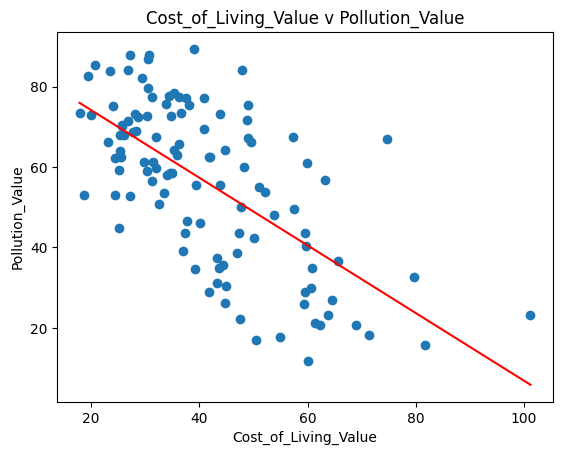

In [ ]:
plt.title("Cost_of_Living_Value v Pollution_Value")
plt.xlabel("Cost_of_Living_Value")
plt.ylabel("Pollution_Value")
plt.scatter(CountryData_Clean.Cost_of_Living_Value, CountryData_Clean.Pollution_Value)
plt.plot(np.unique(CountryData_Clean.Cost_of_Living_Value), np.poly1d(np.polyfit(CountryData_Clean.Cost_of_Living_Value, CountryData_Clean.Pollution_Value, 1))(np.unique(CountryData_Clean.Cost_of_Living_Value)), color='red')

In [ ]:
corr = pearsonr(CountryData_Clean.Cost_of_Living_Value, CountryData_Clean.Pollution_Value)
print(corr)

PearsonRResult(statistic=np.float64(-0.6479386555742476), pvalue=np.float64(6.592293496240193e-15))


In [ ]:
data = sm.add_constant(CountryData_Clean['Cost_of_Living_Value'])
model = sm.OLS(CountryData_Clean['Pollution_Value'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:        Pollution_Value   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     81.05
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           6.59e-15
Time:                        16:41:10   Log-Likelihood:                -471.57
No. Observations:                 114   AIC:                             947.1
Df Residuals:                     112   BIC:                             952.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   91.0275 

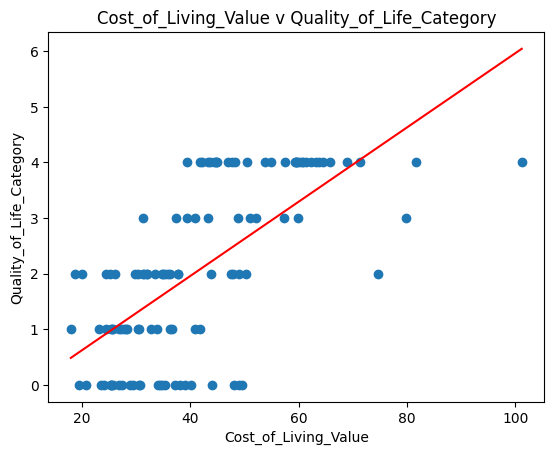

In [ ]:
plt.title("Cost_of_Living_Value v Quality_of_Life_Category")
plt.xlabel("Cost_of_Living_Value")
plt.ylabel("Quality_of_Life_Category")
plt.scatter(CountryData_Clean.Cost_of_Living_Value, CountryData_Clean.Quality_of_Life_Category)
plt.plot(np.unique(CountryData_Clean.Cost_of_Living_Value), np.poly1d(np.polyfit(CountryData_Clean.Cost_of_Living_Value, CountryData_Clean.Quality_of_Life_Category, 1))(np.unique(CountryData_Clean.Cost_of_Living_Value)), color='red')

In [ ]:
corr = pearsonr(CountryData_Clean.Cost_of_Living_Value, CountryData_Clean.Quality_of_Life_Category)
print(corr)

PearsonRResult(statistic=np.float64(0.6687005607011108), pvalue=np.float64(4.286367400225858e-16))


In [ ]:
data = sm.add_constant(CountryData_Clean['Cost_of_Living_Value'])
model = sm.OLS(CountryData_Clean['Quality_of_Life_Category'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

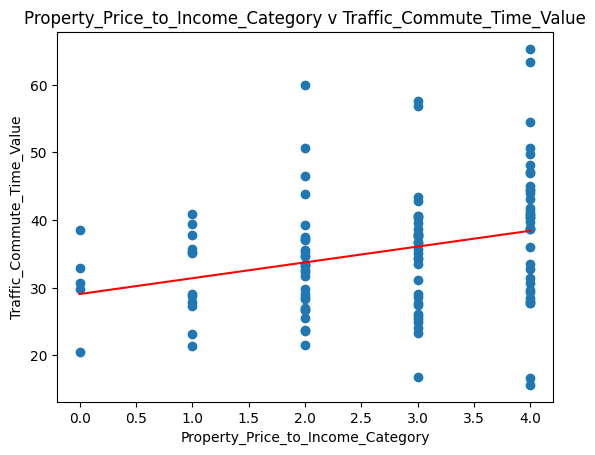

In [ ]:
plt.title("Property_Price_to_Income_Category v Traffic_Commute_Time_Value")
plt.xlabel("Property_Price_to_Income_Category")
plt.ylabel("Traffic_Commute_Time_Value")
plt.scatter(CountryData_Clean.Property_Price_to_Income_Category, CountryData_Clean.Traffic_Commute_Time_Value)
plt.plot(np.unique(CountryData_Clean.Property_Price_to_Income_Category), np.poly1d(np.polyfit(CountryData_Clean.Property_Price_to_Income_Category, CountryData_Clean.Traffic_Commute_Time_Value, 1))(np.unique(CountryData_Clean.Property_Price_to_Income_Category)), color='red')

In [ ]:
corr = pearsonr(CountryData_Clean.Property_Price_to_Income_Category, CountryData_Clean.Traffic_Commute_Time_Value)
print(corr)

PearsonRResult(statistic=np.float64(0.2854818206109962), pvalue=np.float64(0.0020779510473771163))


In [ ]:
data = sm.add_constant(CountryData_Clean['Property_Price_to_Income_Category'])
model = sm.OLS(CountryData_Clean['Traffic_Commute_Time_Value'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                                OLS Regression Results                                
Dep. Variable:     Traffic_Commute_Time_Value   R-squared:                       0.081
Model:                                    OLS   Adj. R-squared:                  0.073
Method:                         Least Squares   F-statistic:                     9.938
Date:                        Wed, 26 Mar 2025   Prob (F-statistic):            0.00208
Time:                                16:42:29   Log-Likelihood:                -411.94
No. Observations:                         114   AIC:                             827.9
Df Residuals:                             112   BIC:                             833.3
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

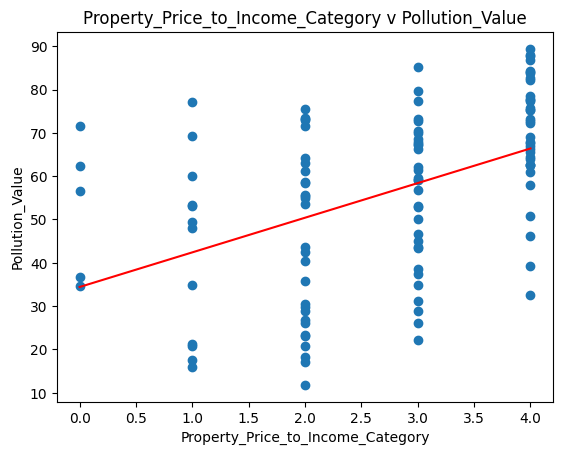

In [ ]:
plt.title("Property_Price_to_Income_Category v Pollution_Value")
plt.xlabel("Property_Price_to_Income_Category")
plt.ylabel("Pollution_Value")
plt.scatter(CountryData_Clean.Property_Price_to_Income_Category, CountryData_Clean.Pollution_Value)
plt.plot(np.unique(CountryData_Clean.Property_Price_to_Income_Category), np.poly1d(np.polyfit(CountryData_Clean.Property_Price_to_Income_Category, CountryData_Clean.Pollution_Value, 1))(np.unique(CountryData_Clean.Property_Price_to_Income_Category)), color='red')

In [ ]:
corr = pearsonr(CountryData_Clean.Property_Price_to_Income_Category, CountryData_Clean.Pollution_Value)
print(corr)

PearsonRResult(statistic=np.float64(0.4598346612701048), pvalue=np.float64(2.648782321339577e-07))


In [ ]:
data = sm.add_constant(CountryData_Clean['Property_Price_to_Income_Category'])
model = sm.OLS(CountryData_Clean['Pollution_Value'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:        Pollution_Value   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     30.03
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           2.65e-07
Time:                        16:42:38   Log-Likelihood:                -489.06
No. Observations:                 114   AIC:                             982.1
Df Residuals:                     112   BIC:                             987.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

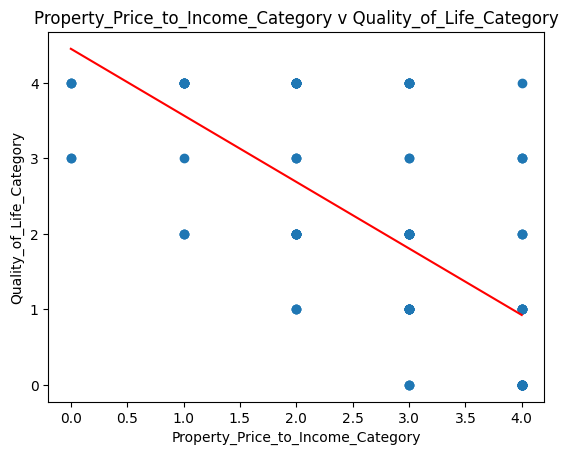

In [ ]:
plt.title("Property_Price_to_Income_Category v Quality_of_Life_Category")
plt.xlabel("Property_Price_to_Income_Category")
plt.ylabel("Quality_of_Life_Category")
plt.scatter(CountryData_Clean.Property_Price_to_Income_Category, CountryData_Clean.Quality_of_Life_Category)
plt.plot(np.unique(CountryData_Clean.Property_Price_to_Income_Category), np.poly1d(np.polyfit(CountryData_Clean.Property_Price_to_Income_Category, CountryData_Clean.Quality_of_Life_Category, 1))(np.unique(CountryData_Clean.Property_Price_to_Income_Category)), color='red')

In [ ]:
corr = pearsonr(CountryData_Clean.Property_Price_to_Income_Category, CountryData_Clean.Quality_of_Life_Category)
print(corr)

PearsonRResult(statistic=np.float64(-0.659956599123636), pvalue=np.float64(1.3911703942448268e-15))


In [ ]:
data = sm.add_constant(CountryData_Clean['Property_Price_to_Income_Category'])
model = sm.OLS(CountryData_Clean['Quality_of_Life_Category'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                               OLS Regression Results                               
Dep. Variable:     Quality_of_Life_Category   R-squared:                       0.436
Model:                                  OLS   Adj. R-squared:                  0.431
Method:                       Least Squares   F-statistic:                     86.42
Date:                      Wed, 26 Mar 2025   Prob (F-statistic):           1.39e-15
Time:                              16:42:46   Log-Likelihood:                -177.39
No. Observations:                       114   AIC:                             358.8
Df Residuals:                           112   BIC:                             364.3
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

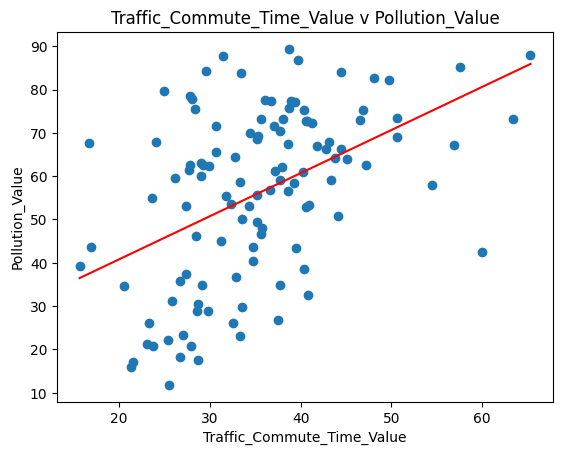

In [ ]:
plt.title("Traffic_Commute_Time_Value v Pollution_Value")
plt.xlabel("Traffic_Commute_Time_Value")
plt.ylabel("Pollution_Value")
plt.scatter(CountryData_Clean.Traffic_Commute_Time_Value, CountryData_Clean.Pollution_Value)
plt.plot(np.unique(CountryData_Clean.Traffic_Commute_Time_Value), np.poly1d(np.polyfit(CountryData_Clean.Traffic_Commute_Time_Value, CountryData_Clean.Pollution_Value, 1))(np.unique(CountryData_Clean.Traffic_Commute_Time_Value)), color='red')

In [ ]:
corr = pearsonr(CountryData_Clean.Traffic_Commute_Time_Value, CountryData_Clean.Pollution_Value)
print(corr)

PearsonRResult(statistic=np.float64(0.4691531375120909), pvalue=np.float64(1.4011463328987127e-07))


In [ ]:
data = sm.add_constant(CountryData_Clean['Traffic_Commute_Time_Value'])
model = sm.OLS(CountryData_Clean['Pollution_Value'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:        Pollution_Value   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     31.61
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           1.40e-07
Time:                        16:42:58   Log-Likelihood:                -488.43
No. Observations:                 114   AIC:                             980.9
Df Residuals:                     112   BIC:                             986.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

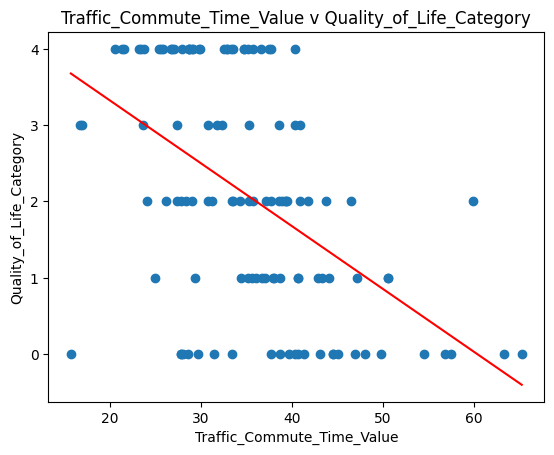

In [ ]:
plt.title("Traffic_Commute_Time_Value v Quality_of_Life_Category")
plt.xlabel("Traffic_Commute_Time_Value")
plt.ylabel("Quality_of_Life_Category")
plt.scatter(CountryData_Clean.Traffic_Commute_Time_Value, CountryData_Clean.Quality_of_Life_Category)
plt.plot(np.unique(CountryData_Clean.Traffic_Commute_Time_Value), np.poly1d(np.polyfit(CountryData_Clean.Traffic_Commute_Time_Value, CountryData_Clean.Quality_of_Life_Category, 1))(np.unique(CountryData_Clean.Traffic_Commute_Time_Value)), color='red')

In [ ]:
corr = pearsonr(CountryData_Clean.Traffic_Commute_Time_Value, CountryData_Clean.Quality_of_Life_Category)
print(corr)

PearsonRResult(statistic=np.float64(-0.5040445869744028), pvalue=np.float64(1.0832439007864127e-08))


In [ ]:
data = sm.add_constant(CountryData_Clean['Traffic_Commute_Time_Value'])
model = sm.OLS(CountryData_Clean['Quality_of_Life_Category'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                               OLS Regression Results                               
Dep. Variable:     Quality_of_Life_Category   R-squared:                       0.254
Model:                                  OLS   Adj. R-squared:                  0.247
Method:                       Least Squares   F-statistic:                     38.15
Date:                      Wed, 26 Mar 2025   Prob (F-statistic):           1.08e-08
Time:                              16:43:08   Log-Likelihood:                -193.28
No. Observations:                       114   AIC:                             390.6
Df Residuals:                           112   BIC:                             396.0
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

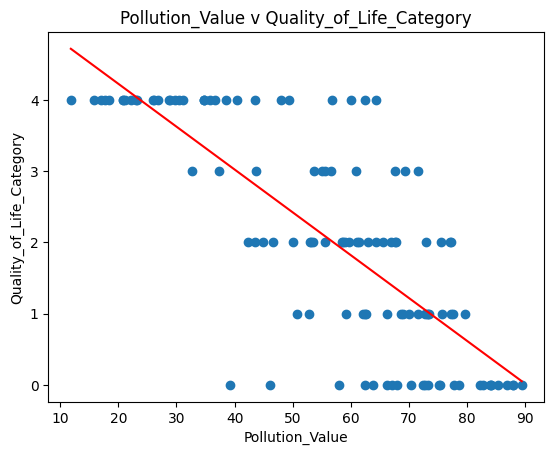

In [ ]:
plt.title("Pollution_Value v Quality_of_Life_Category")
plt.xlabel("Pollution_Value")
plt.ylabel("Quality_of_Life_Category")
plt.scatter(CountryData_Clean.Pollution_Value, CountryData_Clean.Quality_of_Life_Category)
plt.plot(np.unique(CountryData_Clean.Pollution_Value), np.poly1d(np.polyfit(CountryData_Clean.Pollution_Value, CountryData_Clean.Quality_of_Life_Category, 1))(np.unique(CountryData_Clean.Pollution_Value)), color='red')

In [ ]:
corr = pearsonr(CountryData_Clean.Pollution_Value, CountryData_Clean.Quality_of_Life_Category)
print(corr)

PearsonRResult(statistic=np.float64(-0.78416565668823), pvalue=np.float64(5.89820732658347e-25))


In [ ]:
data = sm.add_constant(CountryData_Clean['Pollution_Value'])
model = sm.OLS(CountryData_Clean['Quality_of_Life_Category'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                               OLS Regression Results                               
Dep. Variable:     Quality_of_Life_Category   R-squared:                       0.615
Model:                                  OLS   Adj. R-squared:                  0.611
Method:                       Least Squares   F-statistic:                     178.8
Date:                      Sun, 30 Mar 2025   Prob (F-statistic):           5.90e-25
Time:                              16:19:12   Log-Likelihood:                -155.59
No. Observations:                       114   AIC:                             315.2
Df Residuals:                           112   BIC:                             320.7
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

Multivariate Analysis

In [ ]:
all_country_data = list(zip(CountryData_Clean.Purchasing_Power_Value,CountryData_Clean.Safety_Value,CountryData_Clean.Health_Care_Value,CountryData_Clean.Climate_Value,CountryData_Clean.Property_Price_to_Income_Category,CountryData_Clean.Pollution_Value))


In [ ]:
all_country_data = sm.add_constant(all_country_data)
model = sm.OLS(CountryData_Clean.Quality_of_Life_Category, all_country_data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                               OLS Regression Results                               
Dep. Variable:     Quality_of_Life_Category   R-squared:                       0.876
Model:                                  OLS   Adj. R-squared:                  0.870
Method:                       Least Squares   F-statistic:                     126.5
Date:                      Sun, 30 Mar 2025   Prob (F-statistic):           2.99e-46
Time:                              17:02:13   Log-Likelihood:                -90.781
No. Observations:                       114   AIC:                             195.6
Df Residuals:                           107   BIC:                             214.7
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

5.Normalization 

6.Weighting and Aggregation 

7.Link to other indicators (dont need to do)

8.Visualization of Results 

9.Version control 

10.Deliverables